## PHYS-253 

## Homework 2

Handed out: Tuesday, February 12, 2024

**Due: 4.59 pm; Friday, March 22, 2024**

__________________________________________________________________________________________________________________________

### Problem 1 (deep learning)


a. Build a dense neural net (DNN) with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.

b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as you will use transfer learning for digits 5 to 0 in the next problem. You will need a softmax output layer with five neurons.

c. Try adding Batch Normalization and compare the learning curves. Is it converging faster than before? Does it produce a better model?

d. Try adding dropout to every layer and try again. Does it produce a better model?

In [1]:
#Part a + b since it is easier to combine them

from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

tf.random.set_seed(42)

model_A= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(5, activation="softmax")
])


model_A.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

#need to limit the digits as asked, so basically what we do is the following:
train_filter = (y_train < 5)
test_filter = (y_test < 5)

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

#normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

early_stopping = EarlyStopping(patience=5, verbose=1)

graph = model_A.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])





Epoch 1/100


800/800 [==============================] - 2s 1ms/step - loss: 0.1114 - accuracy: 0.9661 - val_loss: 0.0983 - val_accuracy: 0.9718
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0626 - val_accuracy: 0.9798
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0434 - accuracy: 0.9860 - val_loss: 0.0635 - val_accuracy: 0.9820
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0543 - val_accuracy: 0.9838
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0836 - val_accuracy: 0.9776
Epoch 6/100
800/800 [==============================] - 1s 976us/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0649 - val_accuracy: 0.9812
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0596 - val_accuracy:

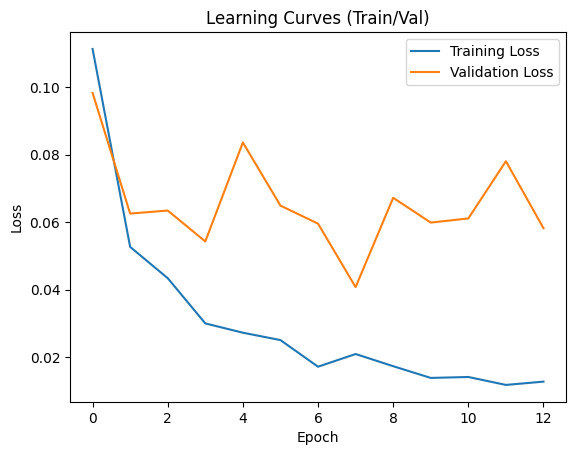

In [2]:
import matplotlib.pyplot as plt

plt.plot(graph.history['loss'], label='Training Loss')
plt.plot(graph.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves (Train/Val)')
plt.legend()
plt.show()

https://chat.openai.com/share/1fd3e0d5-92f9-4891-aabc-b790e3230475

In [3]:
#Part C

tf.random.set_seed(42)

model_A = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(5, activation="softmax")
])


model_A.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

#need to limit the digits as asked, so basically what we do is the following:
train_filter = (y_train < 5)
test_filter = (y_test < 5)

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

#normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

early_stopping = EarlyStopping(patience=5, verbose=1)

graph = model_A.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1261 - accuracy: 0.9606 - val_loss: 0.0885 - val_accuracy: 0.9748
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0616 - accuracy: 0.9798 - val_loss: 0.0513 - val_accuracy: 0.9854
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0482 - accuracy: 0.9845 - val_loss: 0.0452 - val_accuracy: 0.9858
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0542 - val_accuracy: 0.9834
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0360 - val_accuracy: 0.9904
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0642 - val_accuracy: 0.9818
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0233 - accuracy: 0.9914 - val_loss: 0.0580 - val_accuracy: 0.9840

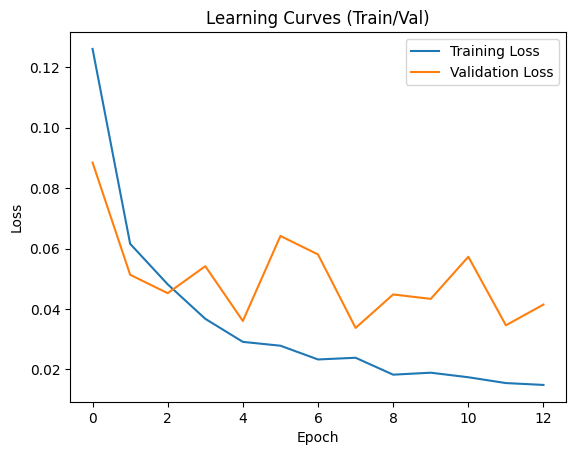

In [4]:
plt.plot(graph.history['loss'], label='Training Loss')
plt.plot(graph.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves (Train/Val)')
plt.legend()
plt.show()

The result is still not satisfactory. At least, compared to the previous model / plot, I can comment that it is still an unacceptable result but at least more acceptable than the previous one.

In [5]:
#Part D

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

model_A = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),  
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),  
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.35),   
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(5, activation="softmax")
])

model_A.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

#need to limit the digits as asked, so basically what we do is the following:
train_filter = (y_train < 5)
test_filter = (y_test < 5)

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

#normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

early_stopping = EarlyStopping(patience=5, verbose=1)

graph = model_A.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

model_A.save("model_A_pre.h5")

Epoch 1/100
800/800 [==============================] - 3s 2ms/step - loss: 0.3622 - accuracy: 0.8949 - val_loss: 0.1014 - val_accuracy: 0.9704
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.1789 - accuracy: 0.9487 - val_loss: 0.0818 - val_accuracy: 0.9734
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.1405 - accuracy: 0.9592 - val_loss: 0.0795 - val_accuracy: 0.9766
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.1190 - accuracy: 0.9647 - val_loss: 0.0622 - val_accuracy: 0.9822
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9692 - val_loss: 0.0571 - val_accuracy: 0.9836
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9734 - val_loss: 0.0519 - val_accuracy: 0.9858
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9768 - val_loss: 0.0470 - val_accuracy: 0.9870

C:\Users\emsbo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


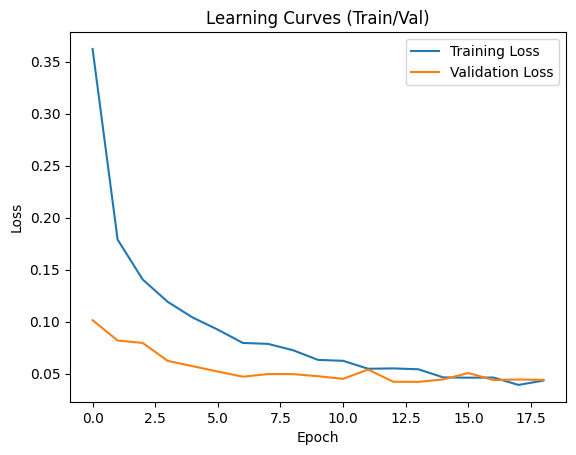

In [6]:
plt.plot(graph.history['loss'], label='Training Loss')
plt.plot(graph.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves (Train/Val)')
plt.legend()
plt.show()

There are still a few issues with the model / plot. At least in this case, after adding the dropouts, there is a satisfactory progress and indeed it made a big change!

__________________________________________________________________________________________________________________________

### Problem 2 (transfer learning)

a. Create a new DNN that reuses all the pretrained hidden layers of the previous model (problem 1 of HW2), freezes them (try freezing all the reused layers for a few epochs, according to the "pretrained layers" example covered in Lecture 5 and presented in pages 373-376 of A. Geron's book ["Reusing Pretrained Layers" and "Transfer Learning with Keras" sections]), and replaces the softmax output layer with a new one. 

b. Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision? 

c. Try reusing just four hidden layers instead of five. Can you achieve a higher precision?

d. Now unfreeze the top two hidden layers and continue training. Can you get the model to perform even better?

In [7]:
#Part a + b (generating the data)

from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

train_filter = (y_train >= 5)
test_filter = (y_test >= 5)

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

num_images_per_digit = 100

indices_train = []
for digit in range(5, 10):
    digit_indices = np.where(y_train == digit)[0]
    selected_indices = np.random.choice(digit_indices, num_images_per_digit, replace=False)
    indices_train.extend(selected_indices)

X_train = X_train[indices_train]
y_train = y_train[indices_train]

X_train = X_train / 255.0
X_test = X_test / 255.0

X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]

y_train_adjusted = y_train - 5
y_valid_adjusted = y_valid - 5
y_test_adjusted = y_test - 5



In [10]:
#Part a + b (creating the NN)

import time
start_time = time.time()
#as shown for the pretrained layers

model_A = tf.keras.models.load_model("model_A_pre.h5")

model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(5, activation="softmax")) 

#Freeze the layers

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])


graph = model_B_on_A.fit(x=X_train, y=y_train_adjusted, epochs=100, validation_data=(X_valid, y_valid_adjusted))
accuracy = model_B_on_A.evaluate(X_test, y_test_adjusted)
print("Test Accuracy:", accuracy[1])


end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 2.3013 - accuracy: 0.2800 - val_loss: 3.9964 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 1.7757 - accuracy: 0.3525 - val_loss: 4.4900 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 1.8262 - accuracy: 0.3850 - val_loss: 4.8523 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 1.5916 - accuracy: 0.4400 - val_loss: 5.2938 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 1.5636 - accuracy: 0.4425 - val_loss: 5.6456 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 1.4339 - accuracy: 0.5025 - val_loss: 5.8737 - val_accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 1.4110 - accuracy: 0.5275 - val_loss: 5.9824 - val_accur

Well depending on the task, an accuracy of 62.41% could be considered as high precision?
<br>
Due to my specs, the total training time is less than 5 seconds, which is quite fast for a PC.

In [12]:
#Part C

tf.random.set_seed(42)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

train_filter = (y_train >= 5)
test_filter = (y_test >= 5)

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

num_images_per_digit = 100

indices_train = []
for digit in range(5, 10):
    digit_indices = np.where(y_train == digit)[0]
    selected_indices = np.random.choice(digit_indices, num_images_per_digit, replace=False)
    indices_train.extend(selected_indices)

X_train = X_train[indices_train]
y_train = y_train[indices_train]

X_train = X_train / 255.0
X_test = X_test / 255.0

X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]

y_train_adjusted = y_train - 5
y_valid_adjusted = y_valid - 5
y_test_adjusted = y_test - 5

model_A = tf.keras.models.load_model("model_A_pre.h5")

model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-2])
model_B_on_A.add(tf.keras.layers.Dense(5, activation="softmax")) 

#Freeze the layers

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])


graph = model_B_on_A.fit(x=X_train, y=y_train_adjusted, epochs=100, validation_data=(X_valid, y_valid_adjusted))
accuracy = model_B_on_A.evaluate(X_test, y_test_adjusted)
print("Test Accuracy:", accuracy[1])

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 2.0295 - accuracy: 0.2600 - val_loss: 2.0941 - val_accuracy: 0.3000
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 1.5905 - accuracy: 0.3825 - val_loss: 2.0649 - val_accuracy: 0.2700
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 1.3516 - accuracy: 0.4600 - val_loss: 2.3262 - val_accuracy: 0.2400
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 1.2307 - accuracy: 0.5150 - val_loss: 2.5876 - val_accuracy: 0.1800
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 1.1676 - accuracy: 0.5350 - val_loss: 2.8520 - val_accuracy: 0.1400
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 1.1133 - accuracy: 0.5700 - val_loss: 3.1000 - val_accuracy: 0.1100
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 1.0583 - accuracy: 0.5700 - val_loss: 3.2791 - val_accuracy: 0.1100
Epoch 8/100


By reducing by one the hidden layers there is a ~2% increase in the accuracy, which is not much but an interesting result.

In [11]:
#Part D

import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

train_filter = (y_train >= 5)
test_filter = (y_test >= 5)

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

num_images_per_digit = 100

indices_train = []
for digit in range(5, 10):
    digit_indices = np.where(y_train == digit)[0]
    selected_indices = np.random.choice(digit_indices, num_images_per_digit, replace=False)
    indices_train.extend(selected_indices)

X_train = X_train[indices_train]
y_train = y_train[indices_train]

X_train = X_train / 255.0
X_test = X_test / 255.0

X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]

y_train_adjusted = y_train - 5
y_valid_adjusted = y_valid - 5
y_test_adjusted = y_test - 5

model_A = tf.keras.models.load_model("model_A_pre.h5")

model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-2])
model_B_on_A.add(tf.keras.layers.Dense(5, activation="softmax")) 

# Unfreeze the top two hidden layers and continue training as asked
for layer in model_B_on_A.layers[-3:]:
    layer.trainable = True

model_B_on_A.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])


graph = model_B_on_A.fit(x=X_train, y=y_train_adjusted, epochs=100, validation_data=(X_valid, y_valid_adjusted))
accuracy = model_B_on_A.evaluate(X_test, y_test_adjusted)
print("Test Accuracy:", accuracy[1])

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 2.5357 - accuracy: 0.3125 - val_loss: 1.2277 - val_accuracy: 0.5700
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0356 - accuracy: 0.6325 - val_loss: 3.0754 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7343 - accuracy: 0.7500 - val_loss: 3.9771 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5430 - accuracy: 0.8200 - val_loss: 4.5396 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.8475 - val_loss: 4.8899 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8800 - val_loss: 5.0611 - val_accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2931 - accuracy: 0.9125 - val_loss: 5.2252 - val_accuracy:

Yes, in this case we have an accuracy of 77.80%. Compared to 63.73% (previous accuracy) it is improved by ~15% and that is a nice improvement so the model is better.

__________________________________________________________________________________________________________________________

### Problem 3

What are the advantages of a CNN over a fully connected DNN for image classification?

1. The most distinct difference (to me at least) is the the amount of time and computational power that it takes to train a CNN over a fully connected DNN.
Especially when it comes to images, the number of coefficients that need to be trained is often orders of magnitude higher.
<br>
2. While the DNN learns a certain feature in one location and can still detect the same feature ONLY in that same location while the architecture of the CNN allows it to generalize and detect it in any location (for example in an images). Thus, we have better generalization with CNN which could also reduce the risk of overfitting when used in larger data.
<br>
3. Another important benefit of the CNN is that they are translation invariant (thanks to the use of shared weights for example). As a result, in the concept of images, it is able to recognize feagures / objects regardless the position that they have in the image.
<br>
4. As mentioned in 1. and 3. , the way that the parameters are shared. In a CNN, the parameters are shared across the whole image compared to a DNN in which you have neurons being connected with each other for many layers.

____________________________________________________________________________________________________________________________

### Problem 4:



In Lecture 6, we discussed a CNN (on MNIST) that uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. [Do not forget to flatten the output of the MaxPool2D layer before stacking the dense layers]. 

Try to beat the level of accuracy (on the test set, the validation set, the train set) achieved in Lecture 6 CNN by adding (or removing) layers, and changing the parameters.

Hint: if it takes too much time to train your CNNs, try running just one of them, but present the "candidate" CNNs you plan to train (without actually train them).


In [38]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.1650 - accuracy: 0.9503 - val_loss: 0.0555 - val_accuracy: 0.9848
Epoch 2/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.0774 - accuracy: 0.9770 - val_loss: 0.0505 - val_accuracy: 0.9872
Epoch 3/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0586 - accuracy: 0.9814 - val_loss: 0.1110 - val_accuracy: 0.9782
Epoch 4/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0339 - val_accuracy: 0.9910
Epoch 5/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0446 - val_accuracy: 0.9894
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0350 - val_accuracy: 0.9916
Epoch 7/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0314 -

[0.027434801682829857, 0.9919000267982483]

1. From the original code we have loss = 0.03287 and  accuracy = 99.09%
<br>
2. Just from adding 2 BatchNormalization layers we got loss = 0.02743 and an accuracy of 99.19%

Just for this 2 changes we got an improvement of 0.1% in accuracy. I am not changing the activation for the hidden layers and the output layer since the current combo seems to give the best results (https://fritz.ai/benchmarking-deep-learning-activation-functions-on-mnist/ ).

In [3]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    zoom_range=0.1,  
    fill_mode='nearest'  
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding="same", activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, kernel_size=5, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, kernel_size=5, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(10, activation="softmax")
])


model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

batch_size = 32
model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=10, 
                    validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)

Epoch 1/10
1718/1718 [==============================] - 96s 52ms/step - loss: 0.2655 - accuracy: 0.9182 - val_loss: 0.0411 - val_accuracy: 0.9890
Epoch 2/10
1718/1718 [==============================] - 85s 50ms/step - loss: 0.0965 - accuracy: 0.9711 - val_loss: 0.0763 - val_accuracy: 0.9778
Epoch 3/10
1718/1718 [==============================] - 84s 49ms/step - loss: 0.0765 - accuracy: 0.9773 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 4/10
1718/1718 [==============================] - 692s 403ms/step - loss: 0.0644 - accuracy: 0.9814 - val_loss: 0.0319 - val_accuracy: 0.9910
Epoch 5/10
1718/1718 [==============================] - 89s 52ms/step - loss: 0.0568 - accuracy: 0.9832 - val_loss: 0.0237 - val_accuracy: 0.9932
Epoch 6/10
1718/1718 [==============================] - 87s 51ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0234 - val_accuracy: 0.9944
Epoch 7/10
1718/1718 [==============================] - 84s 49ms/step - loss: 0.0447 - accuracy: 0.9875 - val_loss: 0.0328

[0.014738322235643864, 0.9951000213623047]

The next changes that came to my mind, were to add more convolutional layers + BatchNormalization for each (since I saw that it helped previously). I did not agree with the percentage of dropouts so I changed that too (and by trial and error 0.35 -> 0.40 yields better results compared to 0.25 -> 0.50). 
<br>
    Furthermore, I introduced translation and rotation to the data (a process which is called "Data Augmentation").
<br>
Finally, I increased the kernel size to 5. It is a debatable change since increasing the kernel number equals to an increasement in features and thus making the model more complex, but in our case it seems to be working positively.
<br>
In this case we get an accuracy of 99.51%, which means that we have an improvement of 0.42%. I would consider this a satisfactory improvement.

__________________________________________________________________________________________________________________________